In [42]:
# Standard modules
import re
import json
import pickle as pkl
import numpy as np
from tabulate import tabulate
# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.data import Batch
from torch_geometric.utils import to_networkx
# NetworkX
import networkx as nx
# RDKit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
# Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
# Bokeh
from bokeh.plotting import figure
from bokeh.layouts import gridplot
from bokeh.io import output_notebook, show
output_notebook()
from Dataset import XASDataset

Loading BokehJS ...

In [2]:
# Load data from json file into dictionary
with open('raw/data_coronene_4sets_0.6.json', 'rb') as file:
    dict = json.load(file)

In [3]:
# Get the name IDs for all molecules
ids = list(dict[0].keys())
# First molecule name ID in list
name = ids[17]
print(name)

R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_1_iOH_1_iEPOXY_0_ieEPOXY_1_1


In [4]:
# dict[0] contains the SMILES for the molecule
print(dict[0][name])

# remove the unnecessary carbon indexes from SMILES
#for i in dict[0]:
#    smiles = dict[0][i]
#    smiles = re.sub(r'\:\d+\]', ']', smiles)
#    dict[0][i] = smiles

[c:0]12[c:2]3[cH:1][cH:24][c:23]4[c:21]1[CH:17]1[C:12]5([OH:25])[c:8]6[c:4]-2[c:6]([cH:7][cH:9][c:10]6=[CH:11][C:13]([OH:16])=[C:14]5[CH2:15][CH:18]2[C:19]1([CH:20]=[CH:22]4)[O:26]2)=[CH:5][CH2:3]3


In [5]:
# dict[1] contains all the individual atomic spectra
spec = dict[1][name]
# with each key being the atom index
print(spec.keys())

dict_keys(['7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '0', '1', '2', '3', '4', '5', '6'])


In [75]:
carbons = 0
features = np.zeros([3, 3, 2, 2])

# Loop through all molecules in datasets
for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() == 6:
            carbons += 1
            if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP:
                if atom.GetTotalNumHs() == 0:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[0, 0, 0, 0] += 1
                        else:
                            features[0, 0, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[0, 0, 1, 0] += 1
                        else:
                            features[0, 0, 1, 1] += 1
                elif atom.GetTotalNumHs() == 1:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[0, 1, 0, 0] += 1
                        else:
                            features[0, 1, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[0, 1, 1, 0] += 1
                        else:
                            features[0, 1, 1, 1] += 1
                elif atom.GetTotalNumHs() == 2:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[0, 2, 0, 0] += 1
                        else:
                            features[0, 2, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[0, 2, 1, 0] += 1
                        else:
                            features[0, 2, 1, 1] += 1
            elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                if atom.GetTotalNumHs() == 0:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[1, 0, 0, 0] += 1
                        else:
                            features[1, 0, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[1, 0, 1, 0] += 1
                        else:
                            features[1, 0, 1, 1] += 1
                elif atom.GetTotalNumHs() == 1:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[1, 1, 0, 0] += 1
                        else:
                            features[1, 1, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[1, 1, 1, 0] += 1
                        else:
                            features[1, 1, 1, 1] += 1
                elif atom.GetTotalNumHs() == 2:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[1, 2, 0, 0] += 1
                        else:
                            features[1, 2, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[1, 2, 1, 0] += 1
                        else:
                            features[1, 2, 1, 1] += 1
            elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                if atom.GetTotalNumHs() == 0:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[2, 0, 0, 0] += 1
                        else:
                            features[2, 0, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[2, 0, 1, 0] += 1
                        else:
                            features[2, 0, 1, 1] += 1
                elif atom.GetTotalNumHs() == 1:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[2, 1, 0, 0] += 1
                        else:
                            features[2, 1, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[2, 1, 1, 0] += 1
                        else:
                            features[2, 1, 1, 1] += 1
                elif atom.GetTotalNumHs() == 2:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[2, 2, 0, 0] += 1
                        else:
                            features[2, 2, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[2, 2, 1, 0] += 1
                        else:
                            features[2, 2, 1, 1] += 1


In [88]:
print(f'Total number of carbons = {carbons}')
print('---')
print('Number of hydrogens bonded to carbon:')
print(f'0 Hs = {np.sum(features[:, 0, :, :])}')
print(f'1 Hs = {np.sum(features[:, 1, :, :])}')
print(f'2 Hs = {np.sum(features[:, 2, :, :])}')
print('---')
print('Hybridisation of carbon:') 
print(f'SP = {np.sum(features[0, :, :, :])}')
print(f'SP2 = {np.sum(features[1, :, :, :])}')
print(f'SP3 = {np.sum(features[2, :, :, :])}')
print('---')
print('Numer of aromatic carbons:')
print(f'True = {np.sum(features[:, :, 0, :])}')
print(f'False = {np.sum(features[:, :, 1, :])}')
print('---')
print('Is carbon in a ring:')
print(f'True = {np.sum(features[:, :, :, 0])}')
print(f'False = {np.sum(features[:, :, :, 1])}')
print('')
print(tabulate(
    [['Aromatic', features[0, 0, 0, 0], features[0, 0, 0, 1]],
     ['Non Aromatic', features[0, 0, 1, 0], features[0, 0, 1, 1]]],
     headers=['SP OH', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[1, 0, 0, 0], features[1, 0, 0, 1]],
     ['Non Aromatic', features[1, 0, 1, 0], features[1, 0, 1, 1]]],
     headers=['SP2 OH', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[1, 1, 0, 0], features[1, 1, 0, 1]],
     ['Non Aromatic', features[1, 1, 1, 0], features[1, 1, 1, 1]]],
     headers=['SP2 1H', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[2, 0, 0, 0], features[2, 0, 0, 1]],
     ['Non Aromatic', features[2, 0, 1, 0], features[2, 0, 1, 1]]],
     headers=['SP3 0H', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[2, 1, 0, 0], features[2, 2, 0, 1]],
     ['Non Aromatic', features[2, 1, 1, 0], features[2, 1, 1, 1]]],
     headers=['SP3 1H', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[2, 2, 0, 0], features[2, 2, 0, 1]],
     ['Non Aromatic', features[2, 2, 1, 0], features[2, 2, 1, 1]]],
     headers=['SP3 2H', 'Ring', 'Not Ring']
))

Total number of carbons = 7946
---
Number of hydrogens bonded to carbon:
0 Hs = 4513.0
1 Hs = 3147.0
2 Hs = 286.0
---
Hybridisation of carbon:
SP = 1.0
SP2 = 6257.0
SP3 = 1688.0
---
Numer of aromatic carbons:
True = 3698.0
False = 4248.0
---
Is carbon in a ring:
True = 7656.0
False = 290.0

SP OH           Ring    Not Ring
------------  ------  ----------
Aromatic           0           0
Non Aromatic       1           0

SP2 OH          Ring    Not Ring
------------  ------  ----------
Aromatic        2613           0
Non Aromatic    1067         172

SP2 1H          Ring    Not Ring
------------  ------  ----------
Aromatic        1085           0
Non Aromatic    1202         118

SP3 0H          Ring    Not Ring
------------  ------  ----------
Aromatic           0           0
Non Aromatic     660           0

SP3 1H          Ring    Not Ring
------------  ------  ----------
Aromatic           0           0
Non Aromatic     742           0

SP3 2H          Ring    Not Ring
----------

In [36]:
bonds = 0
b_features = np.zeros([3, 2, 2])

# Loop through all molecules in datasets
for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    # Loop through all bonds in molecule
    for bond in mol.GetBonds():
        bonds += 1
        # Count the types of bond
        if bond.GetBondType() == Chem.rdchem.BondType.SINGLE:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[0, 0, 0] += 1
                else:
                    b_features[0, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[0, 1, 0] += 1
                else:
                    b_features[0, 1, 1] += 1
        elif bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[1, 0, 0] += 1
                else:
                    b_features[1, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[1, 1, 0] += 1
                else:
                    b_features[1, 1, 1] += 1
        elif bond.GetBondType() == Chem.rdchem.BondType.AROMATIC:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[2, 0, 0] += 1
                else:
                    b_features[2, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[2, 1, 0] += 1
                else:
                    b_features[2, 1, 1] += 1


In [74]:
print(f'Total number of bonds = {bonds}')
print('---')
print('Number of types of bond:')
print(f'Single = {np.sum(b_features[0, :, :])}')
print(f'Double = {np.sum(b_features[1, :, :])}')
print(f'Aromatic = {np.sum(b_features[2, :, :])}')
print('---')
print('Is bond conjugated:')
print(f'True = {np.sum(b_features[:, 0, :])}')
print(f'False = {np.sum(b_features[:, 1, :])}')
print('---')
print('Is bond in a ring:')
print(f'True = {np.sum(b_features[:, :, 0])}')
print(f'False = {np.sum(b_features[:, :, 1])}')
print('')
print(tabulate(
    [['Conjugated', b_features[0, 0, 0], b_features[0, 0, 1]],
     ['Non Conjugated', b_features[0, 1, 0], b_features[0, 1, 1]]],
     headers=['SINGLE', 'Ring', 'Not Ring']
))
print(' ')
print(tabulate(
    [['Conjugated', b_features[1, 0, 0], b_features[1, 0, 1]],
     ['Non Conjugated', b_features[1, 1, 0], b_features[1, 1, 1]]],
     headers=['DOUBLE', 'Ring', 'Not Ring']
))
print(' ')
print(tabulate(
    [['Conjugated', b_features[2, 0, 0], b_features[2, 0, 1]],
     ['Non Conjugated', b_features[2, 1, 0], b_features[2, 1, 1]]],
     headers=['AROMATIC', 'Ring', 'Not Ring']
))

Total number of bonds = 11959
---
Number of types of bond:
Single = 6152.0
Double = 1584.0
Aromatic = 4223.0
---
Is bond conjugated:
True = 7419.0
False = 4540.0
---
Is bond in a ring:
True = 10596.0
False = 1363.0

SINGLE            Ring    Not Ring
--------------  ------  ----------
Conjugated        1054         671
Non Conjugated    4197         230
 
DOUBLE            Ring    Not Ring
--------------  ------  ----------
Conjugated        1046         425
Non Conjugated      76          37
 
AROMATIC          Ring    Not Ring
--------------  ------  ----------
Conjugated        4223           0
Non Conjugated       0           0


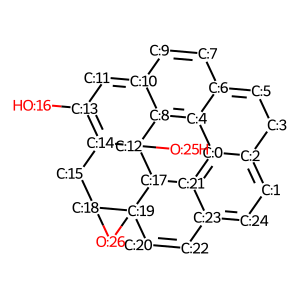

In [6]:
IPythonConsole.drawOptions.addAtomIndices=False
IPythonConsole.molSize = 300,300
# Show the molecule with RDKit
mol = Chem.MolFromSmiles(dict[0][name])
mol

In [23]:
# Plot all CH2 groups
x = np.linspace(280, 300, 200)

plots = []
for i in range(24):
    p = figure()
    glyphs = [p.line(x, spec[str(i)])]
    plots.append(p)


grid = gridplot(
    [plots[3], plots[0], plots[1], plots[12],
     plots[15], plots[2], plots[5], plots[13],
     plots[16], plots[4], plots[7], plots[17],
     None, plots[6], plots[9], plots[18],
     None, plots[8], plots[11], None,
     None, plots[10], plots[19], None,
     None, plots[14], plots[21], None,
     None, plots[20], plots[23], None,
     None, plots[22], None, None], 
    ncols=4, width=300, height=300
)

show(grid)

In [31]:
# Path raw directory containing the data
path = "./"
# Load and create the dataset
dataset = XASDataset(path)

In [32]:
# Show detail of the dataset
print(dataset)
print('------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

XASDataset(7946)
------------
Number of graphs: 7946
Number of features: 16
Number of classes: 1536450


In [33]:
# Show details of the first molecule/graph in dataset
data = dataset[0]

print(data)
print('------------')
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[32, 16], edge_index=[2, 78], y=[200], edge_attrs=[78, 7], vector=[16], idx=[1], smiles='[c:0]12[c:4]3[c:8]4[c:10]5[c:11]([CH:25]=[O:29])[cH:13][c:14]6[c:12]4[c:17]4[c:19]([c:18]([CH:26]=[O:31])[c:15]6[OH:16])=[CH:20][CH:22]6[C:23]([c:21]14)([CH:24]=[CH:1][C:2]2=[CH:3][CH2:5][C:6]3([CH:27]=[O:30])[CH:7]=[CH:9]5)[O:28]6', atom_num=[1], neigbors=[3])
------------
Number of nodes: 32
Number of edges: 78
Average node degree: 2.44
Has isolated nodes: False
Has self loops: False
Is undirected: True


In [44]:
data.smiles

# remove the unnecessary carbon indexes from SMILES
#for i in dataset:
#    smiles = i.smiles
#    smiles = re.sub(r'\:\d+\]', ']', smiles)
#    i.smiles = smiles

'[c:0]12[c:4]3[c:8]4[c:10]5[c:11]([CH:25]=[O:29])[cH:13][c:14]6[c:12]4[c:17]4[c:19]([c:18]([CH:26]=[O:31])[c:15]6[OH:16])=[CH:20][CH:22]6[C:23]([c:21]14)([CH:24]=[CH:1][C:2]2=[CH:3][CH2:5][C:6]3([CH:27]=[O:30])[CH:7]=[CH:9]5)[O:28]6'

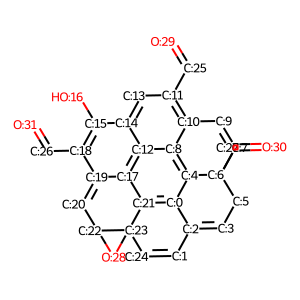

In [47]:
IPythonConsole.drawOptions.addAtomIndices=False
IPythonConsole.molSize = 300,300
# Show the molecule
mol = Chem.MolFromSmiles(data.smiles)
mol

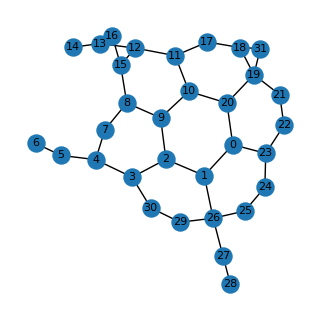

In [46]:
mol_graph = to_networkx(data, to_undirected=True)

plt.figure(figsize=(3,3))

nx.draw(mol_graph, with_labels=True, node_size=150, font_size=8)

plt.show()

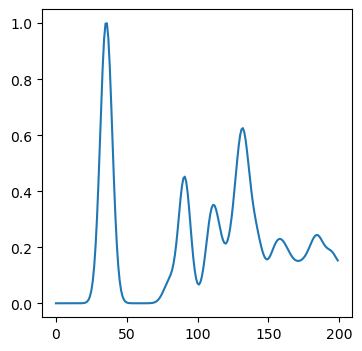

In [7]:
# Show molecule spectrum
plt.figure(figsize=(4,4))

plt.plot(data.y)

plt.show()

In [8]:
train_dataset = dataset[0:300]
val_dataset = dataset[300:330]
test_dataset = dataset[330:375]

In [9]:
type(train_dataset)

Dataset.XASDataset

In [10]:
print(train_dataset[0])
print(train_dataset[0].neigbors)

Data(x=[32, 16], edge_index=[2, 78], y=[200], edge_attrs=[78, 7], vector=[16], idx=[1], smiles='[c:0]12[c:4]3[c:8]4[c:10]5[c:11]([CH:25]=[O:29])[cH:13][c:14]6[c:12]4[c:17]4[c:19]([c:18]([CH:26]=[O:31])[c:15]6[OH:16])=[CH:20][CH:22]6[C:23]([c:21]14)([CH:24]=[CH:1][C:2]2=[CH:3][CH2:5][C:6]3([CH:27]=[O:30])[CH:7]=[CH:9]5)[O:28]6', atom_num=[1], neigbors=[3])
[12, 16, 8]


In [11]:
if train_dataset[0].x[1,1] == 1:
    print('yes')

yes


In [12]:
bond_o = []

for z in range(len(train_dataset)):

    neig = train_dataset[z].neigbors

    for i in enumerate(neig):
        if train_dataset[z].x[i[1],2] == 0:
            bond_o.append(train_dataset[z].y)


In [15]:
with open('raw/data_coronene_4sets_0.6.json', 'rb') as file:
    dict = json.load(file)

In [25]:
ids = list(dict[0].keys())

In [32]:
dict[1][ids[0]]

{'7': [2.2422877413810823e-32,
  4.445664220887121e-31,
  8.333192317184913e-30,
  1.4767792598526795e-28,
  2.474282003960004e-27,
  3.9193336912296225e-26,
  5.869548797267884e-25,
  8.310489912034527e-24,
  1.1124435136985977e-22,
  1.4078576401136268e-21,
  1.6844919823696358e-20,
  1.905498392890784e-19,
  2.037875545418468e-18,
  2.0605168063005142e-17,
  1.9697181958272723e-16,
  1.7801699468698842e-15,
  1.5210667236447736e-14,
  1.2287527369837438e-13,
  9.3844789263934e-13,
  6.7761851029751066e-12,
  4.6258313056218056e-11,
  2.985545905354923e-10,
  1.8217431613668564e-09,
  1.0509449676602924e-08,
  5.731947901512013e-08,
  2.955656270527626e-07,
  1.4409040111513757e-06,
  6.6411854366457425e-06,
  2.8939138332115326e-05,
  0.00011922161952572747,
  0.00046435900367885986,
  0.0017099450594462702,
  0.005953054727554705,
  0.01959417695679729,
  0.06097384873427417,
  0.17938644550450003,
  0.4989592432841347,
  1.3121091155187228,
  3.262152541806553,
  7.667751158031184

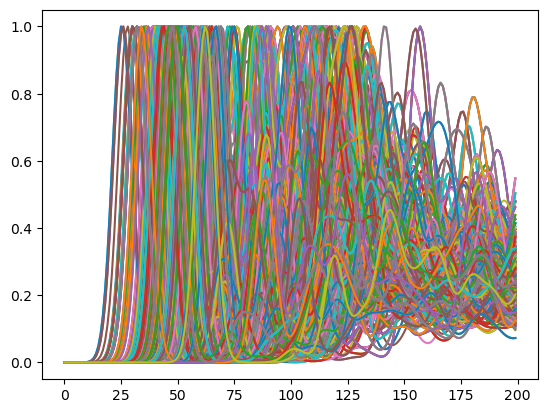

In [64]:
for i in range(len(bond_o)):
    plt.plot(bond_o[i])

plt.show()

In [9]:
test_loader = DataLoader(test_dataset, batch_size=30, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=30, shuffle=False)
train_loader = DataLoader(train_dataset, batch_size=30, shuffle=True)

In [10]:
print(f'Length of training data loader: {len(train_loader.dataset)}')
print(f'Length of validation data loader: {len(val_loader.dataset)}')
print(f'Length of testing data loader: {len(test_loader.dataset)}')

Length of training data loader: 300
Length of validation data loader: 30
Length of testing data loader: 45


In [11]:
print(train_loader.dataset[1])
print(train_loader.dataset[1].vector)
print(train_loader.dataset[1].atom_num)
print(train_loader.dataset[1].neigbors)

Data(x=[29, 16], edge_index=[2, 76], y=[200], edge_attrs=[76, 7], vector=[16], idx=[1], smiles='[c:0]12[c:2]3[cH:1][cH:25][c:24]4[c:22]1[c:17]1[c:13]5[c:15]([cH:16][cH:18][c:19]1[c:20]([OH:21])[cH:23]4)[CH:14]1[CH:12]([C:11]4=[C:9]5[C:4]25[C:6]([C:5]([OH:8])=[CH:3]3)([CH:7]2[CH:10]4[O:26]2)[O:28]5)[O:27]1', atom_num=[1], neigbors=[4])
tensor([0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5920, 0.4080, 0.5300,
        0.4700, 0.0000, 0.0000, 0.0000, 0.5920, 0.4080, 0.5920])
tensor([20])
[19, 21, 24, 27]


In [12]:
class NN(torch.nn.Module):

    def __init__(self):
        
        super(NN, self).__init__()

        self.lin1 = torch.nn.Linear(16, 50)
        self.lin2 = torch.nn.Linear(50, 100)
        self.lin3 = torch.nn.Linear(100, 150)
        self.lin4 = torch.nn.Linear(150, 200)

    def forward(self, batched_data):

        batch_size = batched_data.vector.shape[0] // 16
        batched_data.vector = batched_data.vector.view(batch_size, 16)

        x = batched_data.vector.float()

        p = torch.nn.LeakyReLU(0.1)

        x = self.lin1(x)
        x = p(self.lin2(x))
        x = p(self.lin3(x))
        x = p(self.lin4(x))

        return x

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NN()
print(model)
model = model.to(device)

NN(
  (lin1): Linear(in_features=16, out_features=50, bias=True)
  (lin2): Linear(in_features=50, out_features=100, bias=True)
  (lin3): Linear(in_features=100, out_features=150, bias=True)
  (lin4): Linear(in_features=150, out_features=200, bias=True)
)


In [14]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08, amsgrad=True)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=100, min_lr=0.000001)

In [15]:
def train(epoch):

    model.train()
    loss_all = 0

    for batch in train_loader:

        batch = batch.to(device)

        optimizer.zero_grad()

        pred = model(batch)
        batch_size = batch.y.shape[0] // 200
        batch.y = batch.y.view(batch_size, 200)

        loss = nn.MSELoss()(pred.double(), batch.y.double())

        loss.backward()

        loss_all += loss.item() * batch.num_graphs

        optimizer.step()

    return loss_all / len(train_loader.dataset)

In [16]:
def test(loader):

    model.eval()
    loss_all = 0

    for batch in loader:
        batch = batch.to(device)

        batch_size = batch.y.shape[0] // 200
        batch.y = batch.y.view(batch_size, 200)

        with torch.no_grad():
            pred = model(batch)

        loss = nn.MSELoss()(pred.double(), batch.y.double())

        loss_all += loss.item() * batch.num_graphs

    return loss_all / len(loader.dataset)

In [17]:
epochs = 1000
best_val_error = None
train_losses = []
val_losses = []

for epoch in range(epochs):
    
    loss = train(epoch)
    
    val_error = test(val_loader)
    scheduler.step(val_error)
    #scheduler.step(epoch)
    train_losses.append(loss)
    val_losses.append(val_error)
    
    current_lr = optimizer.param_groups[0]['lr']

    if best_val_error is None or val_error <= best_val_error:
        
        best_val_error = val_error
    if epoch% 50 == 0:
        print(f'Epoch: {epoch:03d}, LR: {current_lr:7f}, TrainLoss: {loss:.7f}, ValLoss:{val_error:7f}, Best_ValLoss:{best_val_error:7f}')


Epoch: 000, LR: 0.010000, TrainLoss: 0.0551282, ValLoss:0.044243, Best_ValLoss:0.044243
Epoch: 050, LR: 0.010000, TrainLoss: 0.0375851, ValLoss:0.040950, Best_ValLoss:0.038099
Epoch: 100, LR: 0.010000, TrainLoss: 0.0343928, ValLoss:0.042209, Best_ValLoss:0.038099
Epoch: 150, LR: 0.005000, TrainLoss: 0.0293715, ValLoss:0.042046, Best_ValLoss:0.038099
Epoch: 200, LR: 0.005000, TrainLoss: 0.0282480, ValLoss:0.043482, Best_ValLoss:0.038099
Epoch: 250, LR: 0.002500, TrainLoss: 0.0245246, ValLoss:0.045466, Best_ValLoss:0.038099
Epoch: 300, LR: 0.002500, TrainLoss: 0.0239685, ValLoss:0.045353, Best_ValLoss:0.038099
Epoch: 350, LR: 0.001250, TrainLoss: 0.0220188, ValLoss:0.046822, Best_ValLoss:0.038099
Epoch: 400, LR: 0.001250, TrainLoss: 0.0219393, ValLoss:0.047002, Best_ValLoss:0.038099
Epoch: 450, LR: 0.000625, TrainLoss: 0.0208812, ValLoss:0.047508, Best_ValLoss:0.038099
Epoch: 500, LR: 0.000625, TrainLoss: 0.0208292, ValLoss:0.047901, Best_ValLoss:0.038099
Epoch: 550, LR: 0.000313, TrainL

In [18]:
def pred_spec(model, index, test_dataset):
    # Set the model to evaluation mode
    model.eval()

    # Get a single graph from the test dataset
    graph_index = index # Index of the graph you want to predict on
    graph_data = test_dataset[graph_index].to(device)
    batch = Batch.from_data_list([graph_data])

    # Pass the graph through the model
    with torch.no_grad():
        pred = model(batch)

    # Access the predicted output for the single graph
    pred_graph = pred[0]
    true_spectrum = graph_data.y.cpu().numpy()
    predicted_spectrum = pred.cpu().numpy()
    predicted_spectrum = predicted_spectrum.reshape(-1)
    
    return predicted_spectrum, true_spectrum

In [19]:
# Create empty dictionary to contain spectra
predict = {}
true = {}

# Loop over all molecules in test dateset and assign to dictionary index
for index in range(len(test_dataset)):
    predict[index], true[index] = pred_spec(model, index, test_dataset)

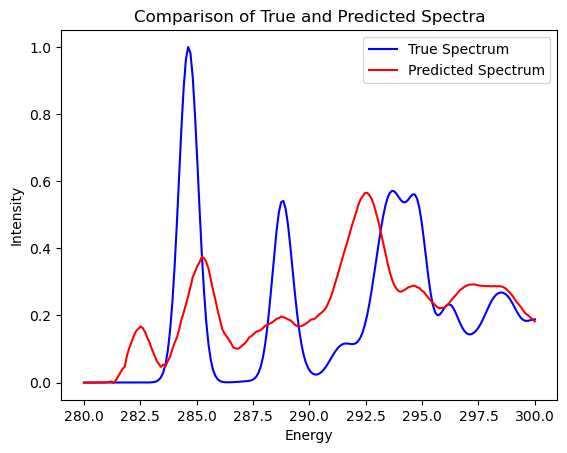

In [26]:
save_var = 0

plot_spectra(predict[7], true[7], save_var)